<a href="https://colab.research.google.com/github/shwe24/PCA/blob/master/DL_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Task-1: Importing packages** 





In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn import decomposition,datasets,preprocessing,svm,metrics
from sklearn.decomposition import PCA,IncrementalPCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import datetime
from sklearn.model_selection import train_test_split

# **Task-2: Reading and getting an insight about data**

In [2]:
food=pd.read_csv('nndb_flat.csv')
food.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [3]:
food.shape

(8618, 45)

In [4]:
food.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [5]:
food['FoodGroup'].value_counts().index   #25 food groups

Index(['Beef Products', 'Vegetables and Vegetable Products', 'Baked Products',
       'Soups, Sauces, and Gravies', 'Lamb, Veal, and Game Products',
       'Poultry Products', 'Legumes and Legume Products', 'Fast Foods',
       'Breakfast Cereals', 'Baby Foods', 'Sweets', 'Fruits and Fruit Juices',
       'Pork Products', 'Beverages', 'Finfish and Shellfish Products',
       'Dairy and Egg Products', 'Sausages and Luncheon Meats',
       'Fats and Oils', 'Cereal Grains and Pasta', 'Snacks',
       'American Indian/Alaska Native Foods', 'Nut and Seed Products',
       'Meals, Entrees, and Side Dishes', 'Restaurant Foods',
       'Spices and Herbs'],
      dtype='object')

## Converting categorical values into numbers 

In [20]:
food['FoodGroup'] = food['FoodGroup'].astype('category')
food["grp_label"] = food["FoodGroup"].cat.codes

In [22]:
food_grp=food['grp_label']
food_grp

0        7
1        7
2        7
3        7
4        7
        ..
8613    10
8614    10
8615    23
8616    10
8617    10
Name: grp_label, Length: 8618, dtype: int8

## Drop redundant and non-informative columns

In [8]:
food_drop=food.drop(columns=['ID','FoodGroup','ShortDescrip','Descrip','CommonName','MfgName','ScientificName'])
food_drop

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


## **Task-3: Normalizing the features**

In [10]:
food_scale = StandardScaler().fit_transform(food_drop)
food_scale

array([[ 2.89623357, -1.01174721,  4.44128945, ..., -0.64991809,
        -0.41055694, -0.55991833],
       [ 2.89623357, -1.01174721,  4.44128945, ..., -0.65484222,
        -0.41055694, -0.57183012],
       [ 3.83495634, -1.06577576,  5.59915265, ..., -0.75332487,
        -0.44590424, -0.58374191],
       ...,
       [ 0.25127886, -1.0923161 , -0.67108312, ..., -0.72870421,
        -0.42116113, -0.53013886],
       [-0.80552224,  0.43375349, -0.58284096, ...,  0.57126681,
         0.52261173, -0.28892514],
       [-0.81142615,  0.78446513, -0.63956806, ...,  0.11824661,
         0.14793037, -0.28892514]])

## Applying PCA - Ploting the relation between the Variance and the Dimensions

[2.59701663e-01 1.08282045e-01 9.01901069e-02 7.71686623e-02
 6.26669880e-02 5.50885569e-02 4.58571468e-02 4.28351812e-02
 3.49009486e-02 3.47818607e-02 2.72411983e-02 2.38442218e-02
 2.30500724e-02 2.06378024e-02 1.71529594e-02 1.50411444e-02
 1.38055218e-02 1.14859027e-02 1.10080361e-02 9.96838044e-03
 8.42122159e-03 6.77049235e-03 9.98874240e-05 2.46325168e-33
 1.98460723e-33 1.79142354e-33 1.64273116e-33 1.55649065e-33
 1.38341666e-33 1.38341666e-33 1.38341666e-33 1.38341666e-33
 1.38341666e-33 1.38341666e-33 1.38341666e-33 1.38341666e-33
 1.38341666e-33 1.38341666e-33]


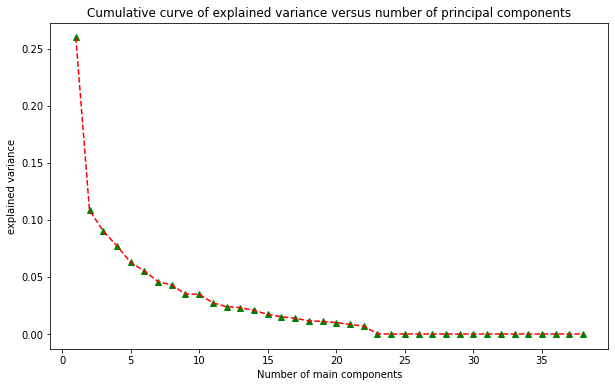

In [12]:
sklearn_pca = PCA(n_components = None)
sklearn_transf = sklearn_pca.fit_transform(food_scale)
varianza_expl = sklearn_pca.explained_variance_ratio_
print(varianza_expl)
#s = list(zip(varianza_expl, pizza_no_brand.columns)) # No hacer zip porque no es correcto
cum_var_exp = np.cumsum(varianza_expl)
plt.figure(figsize = (10, 6))
plt.xlabel('Number of main components')
plt.ylabel('explained variance')
plt.title('Cumulative curve of explained variance versus number of principal components')
nc = np.arange(1, varianza_expl.shape[0] + 1)
plt.plot(nc, varianza_expl, 'g^')
plt.plot(nc, varianza_expl, '--r')
plt.show()

Here the variance is about 80% between the dimentions 0-6. So 6 components are considered

In [36]:

pca = pd.DataFrame(sklearn_transf[:, :6])
df_desc = food.iloc[:, :6]
pca = pca.join(df_desc)
pca=pca.drop(columns=['ShortDescrip','Descrip','CommonName','MfgName','ID'])
pca.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5',5:'c6'}, inplace=True)
pca

,c1,c2,c3,c4,c5,c6,FoodGroup
0,-1.811468,0.244360,0.358148,-1.705050,3.521139,0.552613,Dairy and Egg Products
1,-1.806892,0.251895,0.361289,-1.722863,3.519338,0.545058,Dairy and Egg Products
2,-1.788169,0.230042,0.503071,-2.111154,4.540671,0.657578,Dairy and Egg Products
3,0.404461,0.116966,2.611367,0.508961,-0.618369,0.435269,Dairy and Egg Products
4,0.443959,0.118445,3.476585,0.350402,-0.985125,0.472345,Dairy and Egg Products
...,...,...,...,...,...,...,...
8613,1.043757,2.526914,1.181932,1.661541,1.329422,0.652453,Finfish and Shellfish Products
8614,-0.819215,0.819225,1.250838,1.359015,-0.718280,0.087358,Finfish and Shellfish Products
8615,-1.696311,-1.327648,-0.934428,-2.552526,-0.101841,-1.316227,Sweets
8616,0.699677,0.080787,3.054021,-0.119478,0.448425,0.499595,Finfish and Shellfish Products


In [15]:
pca.sort_values(by='c1')['FoodGroup'][:500].value_counts()

Soups, Sauces, and Gravies             227
Beverages                              174
Fruits and Fruit Juices                 21
Vegetables and Vegetable Products       19
Legumes and Legume Products             11
Sweets                                  11
Fats and Oils                            8
American Indian/Alaska Native Foods      7
Spices and Herbs                         6
Baby Foods                               5
Meals, Entrees, and Side Dishes          4
Dairy and Egg Products                   3
Fast Foods                               2
Baked Products                           1
Sausages and Luncheon Meats              1
Name: FoodGroup, dtype: int64

Plotting first 2 components by Food_group

Text(0, 0.5, 'Second Principal Component')

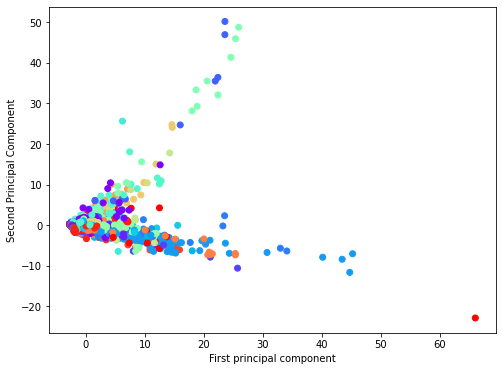

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(pca.iloc[:,0],pca.iloc[:,1],c=food_grp,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# **Task-4: Making test and training set**

In [24]:

X_train, X_test, Y_train, Y_test=train_test_split(food_drop,food_grp,test_size=0.10)

# **Task-5: Comparing the classification result before and after applying PCA**

### Classification using Decision tree after applying PCA

In [34]:

# fits PCA, transforms data and fits the decision tree classifier
# on the transformed data
pipe = Pipeline([('pca', PCA()),
                 ('tree', DecisionTreeClassifier())])
tick=datetime.datetime.now()
pipe.fit(X_train, Y_train)

pipe.predict(X_test)
tock=datetime.datetime.now()
lr_pred_train_time = tock - tick
print('Time taken to predict the data points in the Test set is : ' + str(lr_pred_train_time))
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, pipe.predict(X_test))

Time taken to predict the data points in the Test set is : 0:00:00.442244


0.7238979118329466

The accuracy obtained from classification after applying PCA is **72%** and the time taken to fit the test sets is **0.44 secs**

## Classification using Decision tree without applying PCA

In [35]:
tree =  DecisionTreeClassifier()
tick=datetime.datetime.now()
tree.fit(X_train, Y_train)
tree.predict(X_test)
tock=datetime.datetime.now()
lr_pred_train_time = tock - tick
print('Time taken to predict the data points in the Test set is : ' + str(lr_pred_train_time))
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, tree.predict(X_test))

Time taken to predict the data points in the Test set is : 0:00:00.339480


0.7842227378190255

The accuracy obtained from classification without applying PCA is **78%** and the time taken to fit the test sets is **0.33 secs**



---



## **Due to dimensionality reduction using PCA there may be leakage of data due to which the accuracy of classification is decreased. Hence, PCA is used to remove the least beneficial features so you have a smaller data set, but without losing too much predictive power. PCA need not necessarily increase the accuracy **bold text** **